### QTW Case Study 1 - Fall 2021
- Team Members:
    - Pradeep Kumar
    - Lijju Mathew
    - Sid Swarupananda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PCA is effected by scale so you need to scale the features in the data before applying PCA. You can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features.

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('unique_m.csv').drop(['critical_temp','material'],axis=1)
df = pd.concat([df1,df2],axis=1)
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']
corr = pd.DataFrame(df.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna()
corr = corr.reset_index().rename(columns={'index':'feature'})
corr = corr.loc[1:]

- Import and apply PCA
- Fit PCA 
- Apply the mapping (transform)

In [3]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
X_pca = pd.DataFrame(PCA().fit_transform(X))
evr = pd.DataFrame(pca.explained_variance_ratio_)

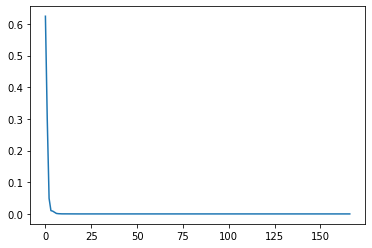

In [4]:
import matplotlib.pyplot as plt
plt.plot(evr.index,evr[0])
plt.show()

In [5]:
PCA_analysis = pd.DataFrame(pca.components_,columns=X.columns)
PCA_analysis.loc[0:3].transpose()

,0,1,2,3
number_of_elements,-0.000128,0.000097,0.000012,0.000008
mean_atomic_mass,0.002584,0.001786,-0.003668,0.005150
wtd_mean_atomic_mass,0.003847,0.000806,0.001116,-0.005058
gmean_atomic_mass,0.003218,0.000472,-0.004055,0.005165
wtd_gmean_atomic_mass,0.004507,-0.000370,0.000707,-0.004934
...,...,...,...,...
Pb,0.000002,0.000002,-0.000003,-0.000003
Bi,-0.000011,0.000008,-0.000006,-0.000074
Po,-0.000000,0.000000,-0.000000,-0.000000
At,-0.000000,0.000000,-0.000000,-0.000000


In [6]:
thresholds  =[0.2,0.3,0.4,0.5,0.6]
for t in thresholds:
    print(t,len(corr[np.abs(corr['critical_temp'])>t]))

0.2 73
0.3 60
0.4 38
0.5 28
0.6 11


In [7]:
floats = [i for i in X.columns if X[i].dtypes!=int]
ints = [i for i in X.columns if X[i].dtypes==int]

for index,i in enumerate(ints):
    plt.subplot(3,1,index+1)
    plt.hist(np.log(X[i]+1))
    plt.show()

In [8]:
corr.dropna()

,feature,critical_temp
1,wtd_std_ThermalConductivity,0.721271
2,range_ThermalConductivity,0.687654
3,range_atomic_radius,0.653759
4,std_ThermalConductivity,0.653632
5,wtd_mean_Valence,-0.632401
...,...,...
154,Pr,-0.008948
155,Sm,0.008856
156,Cd,-0.008565
157,Tm,-0.000520


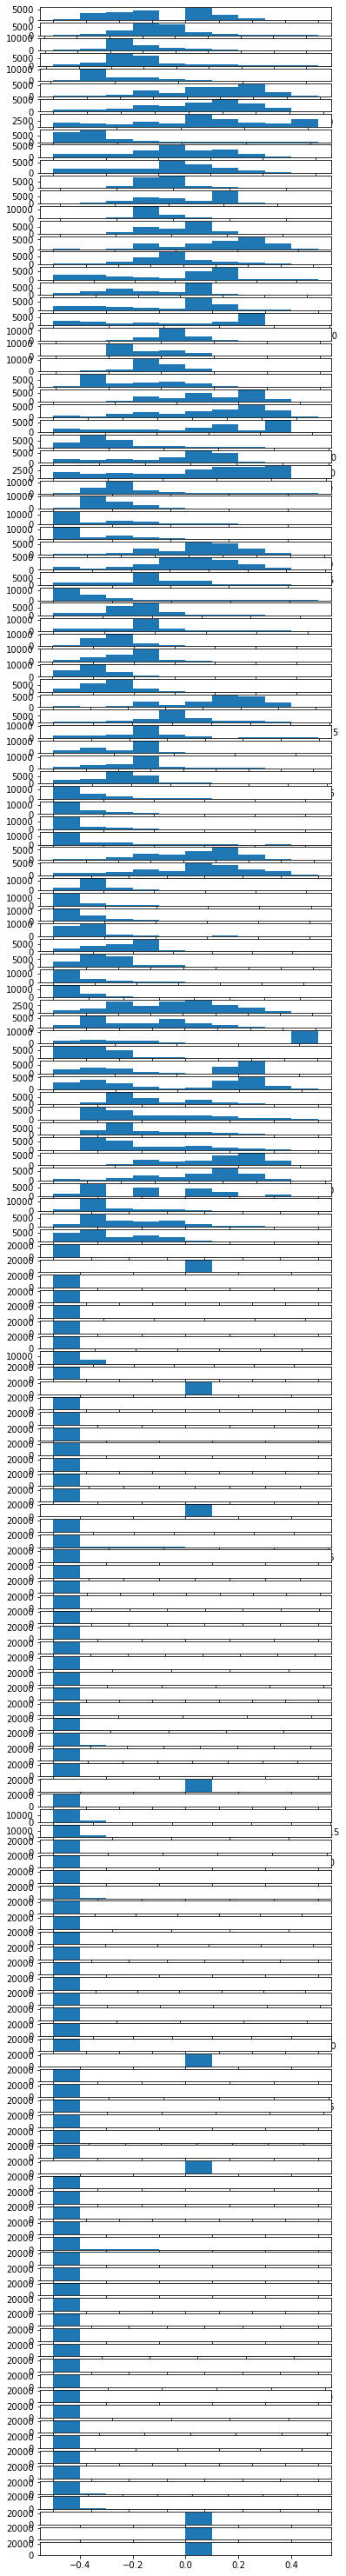

In [9]:
for index,f in enumerate(floats):
    plt.subplot(len(floats),1,index+1)
    plt.hist(X[f])
    plt.subplots_adjust(top=10.3)
plt.show()

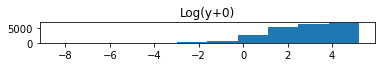

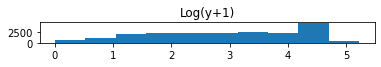

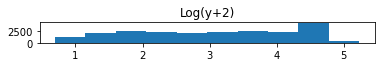

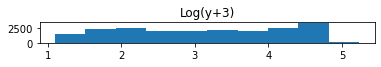

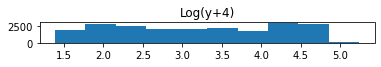

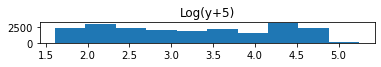

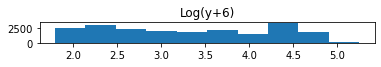

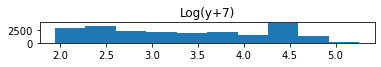

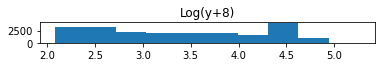

In [10]:
M = 9
for i in range(0,M):
    plt.subplot(M,1,i+1)
    plt.hist(np.log(y+i))
    plt.title('Log(y+'+str(i)+')')
    plt.show()

In [11]:
X[floats].corr()

def get_highly_correlated(data,threshold):
    highly_correlated = []
    for index1,c in enumerate(data.columns):
        for index2,j in enumerate(data.index):
            if index1>index2:
                if np.abs(data.iloc[index1,index2])>threshold:
                    highly_correlated.append((c,j))
    return set([tuple(sorted(i)) for i in highly_correlated])

get_highly_correlated(X[floats].corr(),0.6)

{('As', 'Fe'),
 ('Cu', 'wtd_std_ThermalConductivity'),
 ('O', 'range_ThermalConductivity'),
 ('O', 'range_atomic_radius'),
 ('O', 'std_ThermalConductivity'),
 ('O', 'wtd_entropy_atomic_mass'),
 ('O', 'wtd_gmean_Valence'),
 ('O', 'wtd_gmean_atomic_radius'),
 ('O', 'wtd_gmean_fie'),
 ('O', 'wtd_mean_Valence'),
 ('O', 'wtd_mean_atomic_radius'),
 ('O', 'wtd_mean_fie'),
 ('O', 'wtd_range_fie'),
 ('O', 'wtd_std_ThermalConductivity'),
 ('O', 'wtd_std_atomic_radius'),
 ('O', 'wtd_std_fie'),
 ('Pd', 'Sb'),
 ('entropy_Density', 'entropy_ElectronAffinity'),
 ('entropy_Density', 'entropy_FusionHeat'),
 ('entropy_Density', 'entropy_Valence'),
 ('entropy_Density', 'entropy_atomic_mass'),
 ('entropy_Density', 'entropy_atomic_radius'),
 ('entropy_Density', 'entropy_fie'),
 ('entropy_Density', 'number_of_elements'),
 ('entropy_Density', 'wtd_entropy_Density'),
 ('entropy_Density', 'wtd_entropy_FusionHeat'),
 ('entropy_Density', 'wtd_entropy_Valence'),
 ('entropy_Density', 'wtd_entropy_atomic_mass'),
 (

C:\Users\sswarupa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\sswarupa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


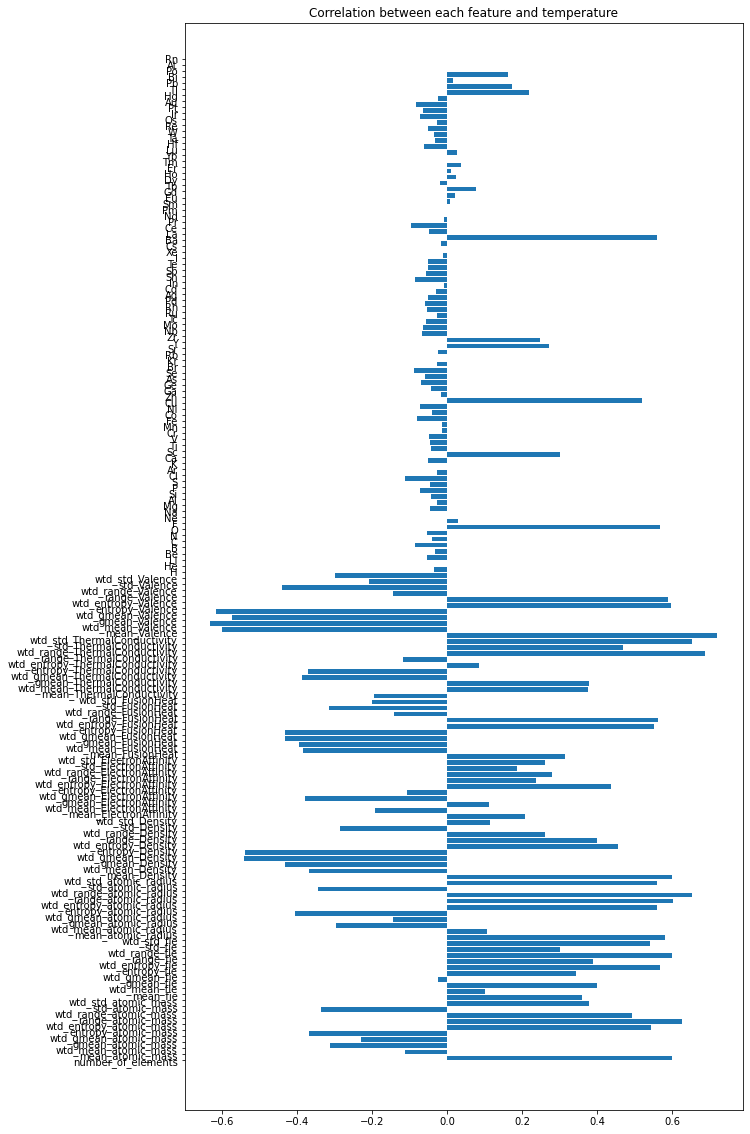

In [12]:
import numpy as np
import matplotlib.pyplot as plt
correlation = {}
for x in X.columns:
    correlation[x] = np.corrcoef(X[x],y)[0,1]
correlations = pd.DataFrame.from_dict(correlation,orient='index').reset_index()
correlations.rename(columns={'index':'Name',0:'Correlation coefficient'},inplace=True)
plt.figure(figsize=(10,20))
plt.barh(correlations['Name'],correlations['Correlation coefficient'],align='edge')
plt.title('Correlation between each feature and temperature')
plt.show()

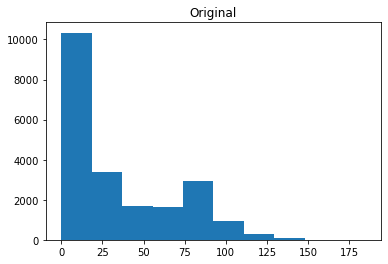

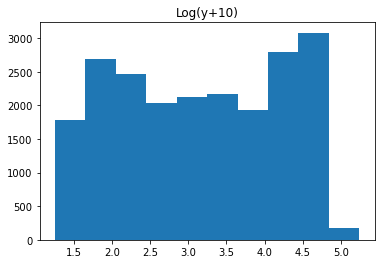

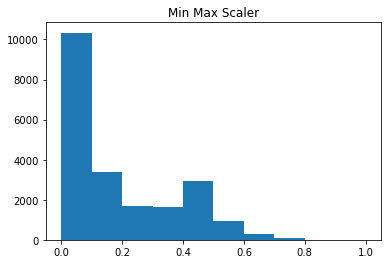

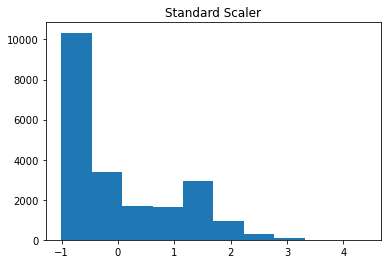

In [13]:
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler


MM = MinMaxScaler()
SS = StandardScaler()
n = Normalizer()

def Normalize(series):
    mean = np.mean(series)
    std = np.std(series)
    return (series - mean)/std

def MinMax(series):
    MAX = max(series)
    MIN = min(series)
    return (series - MIN)/(MAX-MIN)
    

plt.hist(y)
plt.title('Original')
plt.show()
plt.hist(np.log(y+3.51))
plt.title('Log(y+10)')
plt.show()
plt.hist(MinMax(y))
plt.title("Min Max Scaler")
plt.show()
plt.hist(Normalize(y))
plt.title("Standard Scaler")
plt.show()

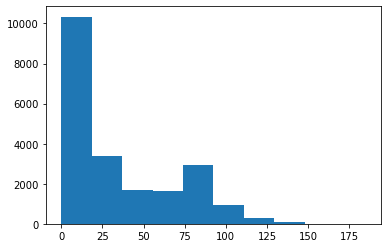

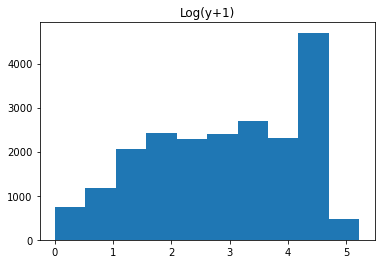

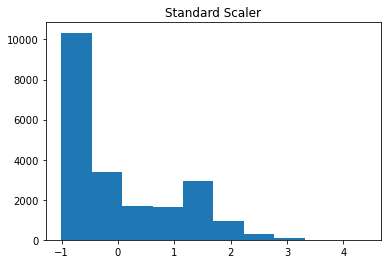

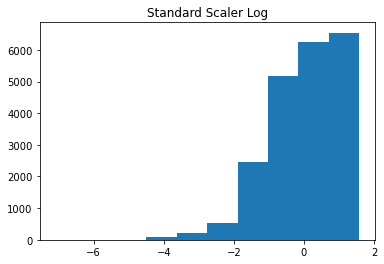

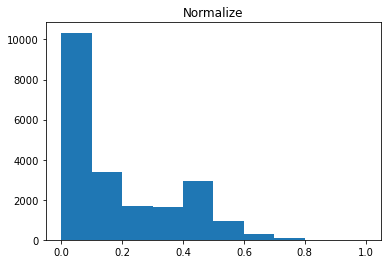

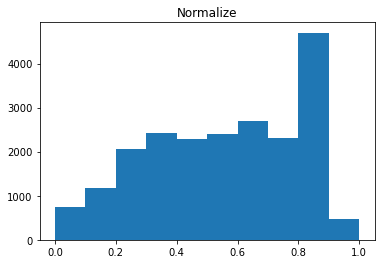

In [14]:
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler

def SS(y):
    y_mean = np.mean(y)
    y_std = np.std(y)
    return (y-y_mean)/y_std

def MinMax(y):
    y_min = min(y)
    y_max = max(y)
    return (y-y_min)/(y_max-y_min)
    

plt.hist(y)
plt.show()
plt.hist(np.log(y+1))
plt.title('Log(y+1)')
plt.show()
plt.hist(SS(y))
plt.title("Standard Scaler")
plt.show()
plt.hist(SS(np.log(y)+1))
plt.title("Standard Scaler Log")
plt.show()
plt.hist(MinMax(y))
plt.title("Normalize")
plt.show()
plt.hist(MinMax(np.log(y+1)))
plt.title("Normalize")
plt.show()

# of Features Highly correlated greater than: |+-0.5| with Temp:  28


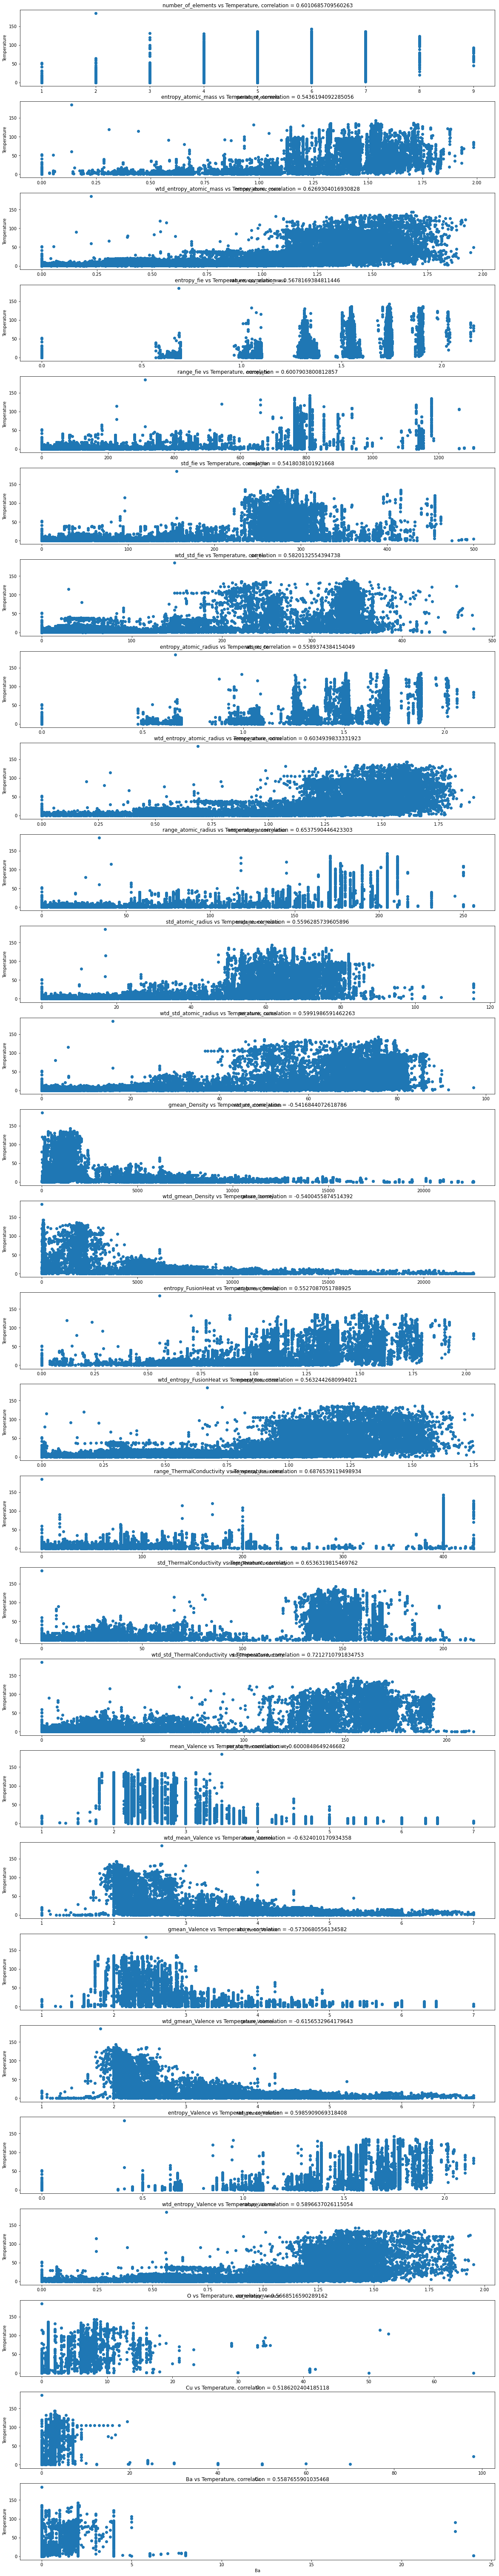

In [15]:
threshold = 0.5
highly_correlated = []
plt.figure(figsize=(20,10))
for index,x in enumerate(X.columns):
    correlation = np.corrcoef(X[x],y)[0,1]
    if np.abs(correlation)>threshold:
        highly_correlated.append(x)
    else:
        pass
    
print('# of Features Highly correlated greater than: |+-'+str(threshold)+'| with Temp: ',len(highly_correlated))
for index,x in enumerate(highly_correlated):
    plt.subplot(len(X.columns),1,index+1)
    plt.scatter(X[x],y)
    correlation = np.corrcoef(X[x],y)[0,1]
    plt.title(str(x)+' vs Temperature, correlation = '+str(correlation))
    plt.ylabel('Temperature')
    plt.xlabel(str(x))
    plt.subplots_adjust(top=50)
plt.show()

In [16]:
corr = df[highly_correlated].corr()
corr.style.background_gradient()

,number_of_elements,entropy_atomic_mass,wtd_entropy_atomic_mass,entropy_fie,range_fie,std_fie,wtd_std_fie,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,gmean_Density,wtd_gmean_Density,entropy_FusionHeat,wtd_entropy_FusionHeat,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,O,Cu,Ba
number_of_elements,1.000000,0.939304,0.881845,0.973195,0.781227,0.674005,0.717831,0.972245,0.904121,0.768060,0.624810,0.695089,-0.630504,-0.649882,0.900759,0.860479,0.696060,0.602018,0.665580,-0.609412,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.541654,0.416454,0.288504
entropy_atomic_mass,0.939304,1.000000,0.889709,0.964695,0.703397,0.600950,0.660164,0.972329,0.880213,0.708109,0.566698,0.647365,-0.546342,-0.574118,0.928251,0.845089,0.678341,0.597723,0.650085,-0.551641,-0.586855,-0.554477,-0.592817,0.963621,0.861479,0.509021,0.399197,0.302135
wtd_entropy_atomic_mass,0.881845,0.889709,1.000000,0.891982,0.744625,0.661304,0.731250,0.890615,0.961464,0.774054,0.660625,0.737633,-0.596833,-0.655734,0.835019,0.873931,0.688968,0.618855,0.684497,-0.583784,-0.644336,-0.586226,-0.650247,0.897636,0.918284,0.602812,0.444205,0.386289
entropy_fie,0.973195,0.964695,0.891982,1.000000,0.767796,0.672087,0.708893,0.997739,0.920192,0.773937,0.648793,0.710635,-0.624222,-0.643319,0.916592,0.864214,0.683849,0.602524,0.650649,-0.596644,-0.624606,-0.608303,-0.637874,0.992726,0.907923,0.515072,0.391452,0.291263
range_fie,0.781227,0.703397,0.744625,0.767796,1.000000,0.981628,0.940281,0.740917,0.797663,0.908734,0.864620,0.871711,-0.815491,-0.802732,0.593817,0.657066,0.683591,0.642073,0.670738,-0.740985,-0.731329,-0.757749,-0.746731,0.782544,0.771949,0.585556,0.412738,0.404561
std_fie,0.674005,0.600950,0.661304,0.672087,0.981628,1.000000,0.934255,0.640613,0.720724,0.882073,0.876079,0.859059,-0.808759,-0.788032,0.474265,0.557049,0.635063,0.610638,0.623650,-0.721737,-0.696705,-0.740587,-0.713240,0.689995,0.689920,0.547688,0.373919,0.385480
wtd_std_fie,0.717831,0.660164,0.731250,0.708893,0.940281,0.934255,1.000000,0.685378,0.781457,0.887192,0.844422,0.922258,-0.795222,-0.825228,0.574690,0.653455,0.740069,0.707854,0.709665,-0.728561,-0.754516,-0.730065,-0.760538,0.736856,0.724825,0.703184,0.419198,0.421462
entropy_atomic_radius,0.972245,0.972329,0.890615,0.997739,0.740917,0.640613,0.685378,1.000000,0.914223,0.744782,0.610407,0.679566,-0.594851,-0.616824,0.930294,0.867423,0.679010,0.595524,0.644207,-0.579872,-0.610735,-0.590868,-0.623531,0.989546,0.898930,0.507257,0.387549,0.277966
wtd_entropy_atomic_radius,0.904121,0.880213,0.961464,0.920192,0.797663,0.720724,0.781457,0.914223,1.000000,0.812398,0.709369,0.781488,-0.654177,-0.687890,0.841120,0.907860,0.690578,0.621078,0.675969,-0.623502,-0.660216,-0.635244,-0.677313,0.919184,0.951463,0.594075,0.415950,0.337794
range_atomic_radius,0.768060,0.708109,0.774054,0.773937,0.908734,0.882073,0.887192,0.744782,0.812398,1.000000,0.967428,0.958004,-0.815835,-0.817334,0.639652,0.666575,0.736137,0.697465,0.736142,-0.759162,-0.756621,-0.761860,-0.761772,0.796085,0.768452,0.616787,0.462414,0.529546


### Articles referred for this case study
- https://www.kaggle.com/apapiu/regularized-linear-models 
- https://www.sciencedirect.com/science/article/abs/pii/S0927025618304877?via%3Dihub
- https://stats.stackexchange.com/questions/234668/how-should-i-deal-with-highly-correlated-features
